<a href="https://colab.research.google.com/github/nsaedae/Colab/blob/master/Ch03.%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%8B%A4%EC%8A%B5/3_%EB%94%A5%EB%9F%AC%EB%8B%9D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
날짜 : 2022/05/10
이름 : 김철학
내용 : 딥러닝 CNN 모델 실습하기
"""
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from sklearn.model_selection import train_test_split
from PIL import Image
tf.__version__

'2.8.0'

In [15]:
#데이터 불러오기
(cifar_train_data, cifar_train_label), (cifar_test_data, cifar_test_label) = load_data()

In [16]:
#데이터 확인
print(cifar_train_data.shape)
print(cifar_test_data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


[6]


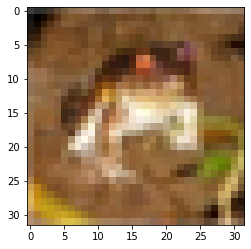

In [17]:
#이미지 확인
plt.imshow(cifar_train_data[0])
print(cifar_train_label[0])

[47169 44770  3070 19335  9776  7273  9489 11518 25290]


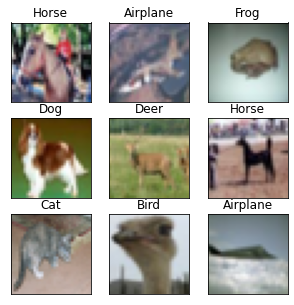

In [18]:
#데이터 샘플 확인
label_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
random_idx = np.random.randint(50000, size=9)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  label = cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx, :])
  plt.title(label_names[label])

In [19]:
#모델학습을 위한 데이터 전처리(정규화)
cifar_train_data2 = cifar_train_data / 255
cifar_test_data2 = cifar_test_data / 255

In [22]:
#데이터 라벨을 범주형(one-hot encoding)으로 변환
cifar_train_label2 = to_categorical(cifar_train_label)
cifar_test_label2 = to_categorical(cifar_test_label)
cifar_train_label2[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [34]:
#학습모델 구성
model = Sequential()

#CNN층
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

#FCNN층
model.add(Flatten())
model.add(Dense(256, activation='relu'))   #은닉층
model.add(Dense(10, activation='softmax')) #출력층

#모델확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [35]:
#학습모델 설정
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [37]:
#학습하기
model.fit(cifar_train_data2, cifar_train_label2, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1694 - acc: 0.9489
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1088 - acc: 0.9649
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1099 - acc: 0.9652
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1091 - acc: 0.9660
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1099 - acc: 0.9652
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1078 - acc: 0.9663
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1021 - acc: 0.9686
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1049 - acc: 0.9670
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1047 - acc: 0.9674
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1106 - acc: 0.9651


In [50]:
#테스트
result = model.evaluate(cifar_test_data2, cifar_test_label2)
result

313/313 [==============================] - 1s 3ms/step - loss: 1.4942 - acc: 0.7577


[1.4941719770431519, 0.7577000260353088]

In [ ]:
#이미지 확인
plt.imshow(cifar_test_data[1])
print(cifar_test_label[1])

In [51]:
#학습모델 저장
model.save('/content/drive/MyDrive/파이썬 데이터 과학 실습/file/cifar_model.h5')